#### Paper one
---
Modal disparities in spatiotemporal accessibility to non-work activities on the commute home from work in Warsaw, Poland
===

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
pd.options.mode.chained_assignment = None 
# test

### parameters

In [2]:
Bs= [60, 75, 90, 105, 120] 
t_ks =[30,40,50,60,70,80,90]

### prepare

In [3]:
od_PuT = pd.read_csv('data//MTX_99321.csv', index_col = 'Unnamed: 0')
od_PuT.columns = [int(c) for c in od_PuT.columns]
od_PrT = pd.read_csv('data//MTX_99421.csv', index_col = 'Unnamed: 0')
od_PrT.columns = [int(c) for c in od_PrT.columns]
od_PrT = od_PrT.stack().reset_index()
od_PrT.columns=['Z_Rejon',"Do_Rejon", 'TripsPrT']
od_PrT.TripsPrT = od_PrT.TripsPrT.astype('float32')
od_PuT = od_PuT.stack().reset_index()
od_PuT.columns=['Z_Rejon',"Do_Rejon", 'TripsPuT']
od_PuT.TripsPuT = od_PuT.TripsPuT.astype('float32')
od_PrT = od_PrT[od_PrT.TripsPrT>0.05]
od_PuT = od_PuT[od_PuT.TripsPuT>0.05]
#od = pd.merge(od_PrT, od_PuT, on = ['Z_Rejon', "Do_Rejon"])

In [4]:
od_PuT.head()

,Z_Rejon,Do_Rejon,TripsPuT
0,1,1,0.76
2,1,3,6.66
3,1,4,2.98
4,1,5,5.28
5,1,6,7.44


In [4]:
od_PuT.Z_Rejon = od_PuT.Z_Rejon.astype('int32')
od_PrT.Z_Rejon = od_PrT.Z_Rejon.astype('int32')
od_PuT.Do_Rejon=od_PuT.Do_Rejon.astype('int32')
od_PrT.Do_Rejon=od_PrT.Do_Rejon.astype('int32')
od_PrT.TripsPrT=od_PrT.TripsPrT.astype('float32')
od_PuT.TripsPuT=od_PuT.TripsPuT.astype('float32')

# Funcs

In [5]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'p_%s' % n
    return percentile_
aggs = ['mean','min','max','std','median', percentile(25), percentile(75)]

In [6]:
def calc_commute(trips,B,t_k,mode, folder = 'data//res//'):
    name = "_{}_{}_{}_filter".format(mode,str(B),str(t_k))
    print(name)
    print('A_jki')
    trips['A'] = B - trips.t - t_k
    trips.A[trips.A < 0] = 0
    trips.A[trips.A > 0] = trips.A + t_k
    print('A_ji_C')
    A_ji_C = trips[trips.A>0].groupby(by=['i','j'])['A'].agg(aggs)
    A_ji_C.columns = ['A_ji' + name + str(col)  for col in A_ji_C.columns]
    A_ji_C.to_csv(folder+'A_ji_C'+name+".csv")
    print('WA_ji_C')
    A_ji_C = trips[trips.A>0].groupby(by=['i','j'])['A'].agg(aggs).mul(wektor['c'],axis=0).reindex(ndf.index)
    A_ji_C.columns = ['A_ji' + name + str(col)  for col in A_ji_C.columns]
    A_ji_C.to_csv(folder+'A_ji_C'+name+".csv")
    
    print('A_i_C')
    A_i_C = trips[trips.A>0].groupby(by=['i'])['A'].agg(aggs)
    A_i_C.columns = ['A_i_C' + name + str(col)  for col in A_i_C.columns]
    A_i_C.to_csv(folder+'A_i_C'+name+".csv")
    print('A_i_H')
    A_i_H = trips[(trips.i == trips.j) & (trips.A>0)].groupby(by=['i'])['A'].agg(aggs)
    A_i_H.columns = ['A_i_H' + name + str(col)  for col in A_i_H.columns]
    A_i_H.to_csv(folder+'A_i_H'+name+".csv")     

### JRT

In [ ]:
usecols = ['Z_Rejon','POI','Do_Rejon','Czas_PrT']
dtype={'Unnamed: 0':'int32','Z_Rejon': 'int16',
       'Czas_PuT': 'float32',
 'Do_Rejon': 'int16',
 'POI': 'int16'}
trips_JRT = pd.read_csv('data//From_Via_To_JRT.csv', dtype = dtype)
del trips_JRT['Unnamed: 0']

In [8]:
trips_JRT.Czas_PuT = trips_JRT.Czas_PuT.astype('float32') 

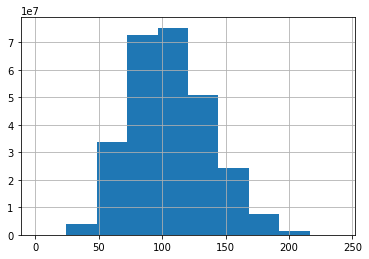

In [9]:
trips_JRT[trips_JRT['Czas_PuT']<4000]['Czas_PuT'].hist()

In [10]:
trips_JRT = trips_JRT[trips_JRT.Czas_PuT<600]

In [11]:
trips_JRT = pd.merge(trips_JRT,od_PuT, on = ['Z_Rejon',"Do_Rejon"])

In [12]:
del trips_JRT['TripsPuT']

In [13]:
trips_JRT.columns = ['j','k','i','t']

In [14]:
trips_JRT.head()

,j,k,i,t
0,1,153,1,23.90
1,1,329,1,22.79
2,1,345,1,24.75
3,1,170,1,31.45
4,1,136,1,35.09


# LOOP

In [15]:
for B in Bs:
    for t_k in t_ks:
        if B>t_k:
            calc_commute(trips_JRT,B,t_k,mode="PT", folder = 'data//res//')

_PT_60_30_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_60_40_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_60_50_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_75_30_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_75_40_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_75_50_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_75_60_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_75_70_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_90_30_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_90_40_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_90_50_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_90_60_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_90_70_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_90_80_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_105_30_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_105_40_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_105_50_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_105_60_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_105_70_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_105_80_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_105_90_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_120_30_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_120_40_filter
A_jki
A_ji_C
A_i_C
A_i_H
_PT_120_50_filter
A_jki
A

In [16]:
del [[trips_JRT]]
trips_JRT = pd.DataFrame()

### PRT

In [7]:
usecols = ['Z_Rejon','POI','Do_Rejon','Czas_PuT']
dtype={'Unnamed: 0':'int32','Z_Rejon': 'int16',
 'Czas_PrT': 'float32',
 'Do_Rejon': 'int16',
 'POI': 'int16'}
trips_PRT = pd.read_csv('data//From_Via_To_PRT.csv', dtype = dtype)
del trips_PRT['Unnamed: 0']

In [8]:
trips_PRT = trips_PRT[trips_PRT.Czas_PrT<600]

In [9]:
trips_PRT = pd.merge(trips_PRT,od_PrT, on = ['Z_Rejon',"Do_Rejon"])

In [10]:
del trips_PRT['TripsPrT']

In [11]:
trips_PRT.columns = ['j','k','i','t']

In [12]:
trips_PRT.head()

,j,k,i,t
0,1,153,1,22.11
1,1,329,1,22.35
2,1,345,1,24.31
3,1,170,1,24.52
4,1,136,1,27.21


# LOOP

In [13]:
for B in Bs:
    for t_k in t_ks:
        if B>t_k:
            calc_commute(trips_PRT,B,t_k,mode="Car", folder = 'data//res//')

_Car_60_30_filter
A_jki
A_ji_C
A_i_C
A_i_H
_Car_60_40_filter
A_jki
A_ji_C
A_i_C
A_i_H
_Car_60_50_filter
A_jki
A_ji_C
A_i_C
A_i_H
_Car_75_30_filter
A_jki
A_ji_C
A_i_C
A_i_H
_Car_75_40_filter
A_jki
A_ji_C
A_i_C
A_i_H
_Car_75_50_filter
A_jki
A_ji_C
A_i_C
A_i_H
_Car_75_60_filter
A_jki
A_ji_C
A_i_C
A_i_H
_Car_75_70_filter
A_jki
A_ji_C
A_i_C
A_i_H
_Car_90_30_filter
A_jki
A_ji_C


KeyboardInterrupt: 

In [ ]:
del [[trips_PRT]]
trips_PRT = pd.DataFrame()